**Import necessary libraries:**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import r2_score

**Define a function:**

In [2]:
def f(x):
    return 200+x*x+x*np.sin(x)-5*(x**1.4)

**Plot the function:**

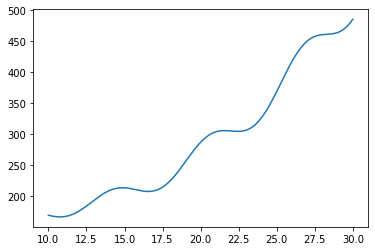

In [3]:
xPlot = np.arange(10,30.1,0.1, dtype=float)
yPlot = f(xPlot)
plt.plot(xPlot, yPlot)
plt.show()

**Produce data using above defined function to practice GPR and generate a benchmark:**

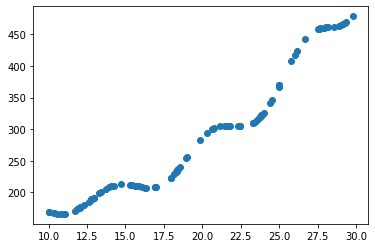

In [4]:
np.random.seed(1)
xData = 10+20*np.random.rand(100)
yData = f(xData)
plt.scatter(xData, yData)
plt.show()

**Prepare data for scikitlearn functions:** <br>
Input array should be a 2d array, rows representing each data and columns each feature dimension <br>
*atleast_2d function converts 1d array to 2d and ravel does the reverse by placing/removing outer brackets*

In [5]:
xGPR = np.atleast_2d(xData).T
yGPR = f(xGPR).ravel()

**GPR model definitions:**
- Kernels are usually defined as a multiplication of a constant kernel with RBF kernel. White kernels are also used for automatic noise level generation.
- First input is length scale and second input is lower and upper bounds of length scale.
- If length scale is an array, it defines length scale for each input feature dimension. <br> *Example kernel with 2 input features: kernel = C(1.0, (1e-3, 1e3)) * RBF([5,5], (1e-2, 1e2))*

In [6]:
kernel = C(1.0, (1e-3,1e3))*RBF(10, (1e-3, 1e4))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, normalize_y=True, alpha=1e-3).fit(xGPR,yGPR)

**Check the final kernel parameters and R^2:**

In [7]:
print(gp.kernel_)

31.6**2 * RBF(length_scale=2.34)


**Check the predictions with some test inputs:**

R2 = 0.9999999617621265


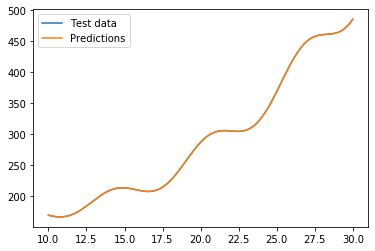

In [8]:
xTest = np.atleast_2d(xPlot).T
yTest, MSE = gp.predict(xTest, return_std=True)
print('R2 =',r2_score(yPlot, yTest))
plt.plot(xPlot, yPlot, label='Test data')
plt.plot(xPlot, yTest.ravel(), label='Predictions')
plt.legend()
plt.show()